## https://www.kaggle.com/competitions/titanic/overview

### KOD:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import KNNImputer

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

### Zmienne, ktróre są bezużyteczne w modelowaniu:

1. Zmienna jest monotoniczna (przyjmuje takie same wartości dla wszystkich obserwacji)
2. Zmienna jest unikalna (przyjmuje unikalne wartości dla każdej zmiennej)

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [6]:
train_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

## Zmienna celu (zmienna zależna):
Zmienna celu, znana również jako zmienna zależna, to zmienna, którą chcesz przewidzieć lub wyjaśnić. Jest to wynik, który chcesz zrozumieć lub przewidzieć.

Przetrwał czy nie (0 nie przeżył, a 1 przeżył)

## Zmienne niezależne:
Zmienne niezależne, zwane także zmiennymi predykcyjnymi, to zmienne używane do wyjaśniania lub przewidywania zmiennej celu.

Stanowią one dane wejściowe do modelu predykcyjnego i zakłada się, że wpływają na zmienną celu lub mają z nią związek.

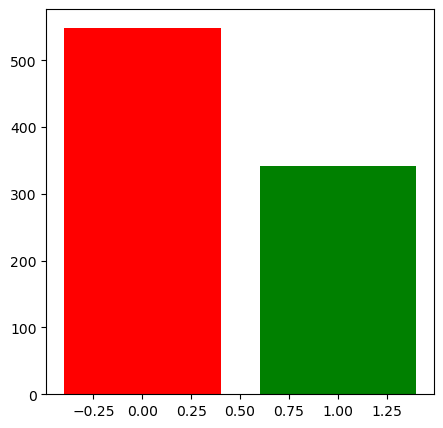

In [9]:
plt.figure(figsize=(5,5))

plt.bar(list(train_data["Survived"].value_counts().keys()),list(train_data["Survived"].value_counts()),color=["r","g"]);

## Pclass - Ticket class 1st , 2nd and 3rd

In [10]:
train_data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

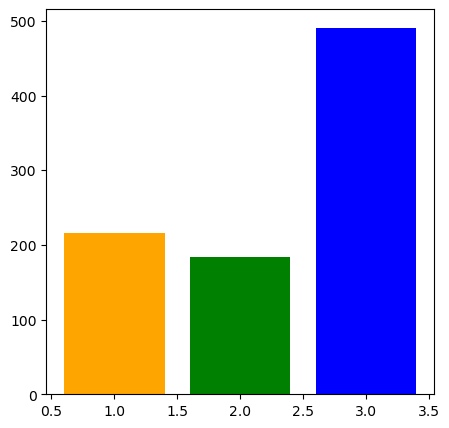

In [11]:
plt.figure(figsize=(5,5))

plt.bar(list(train_data["Pclass"].value_counts().keys()),list(train_data["Pclass"].value_counts()),color=["blue","orange","green"])

plt.show()

In [12]:
train_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

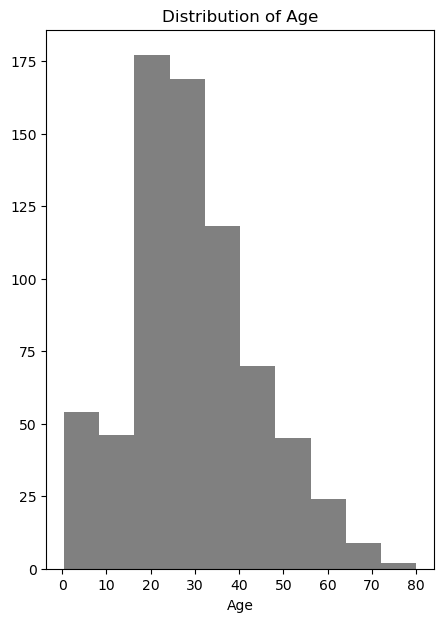

In [13]:
plt.figure(figsize=(5,7))
plt.hist(train_data["Age"],color="grey")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.show()

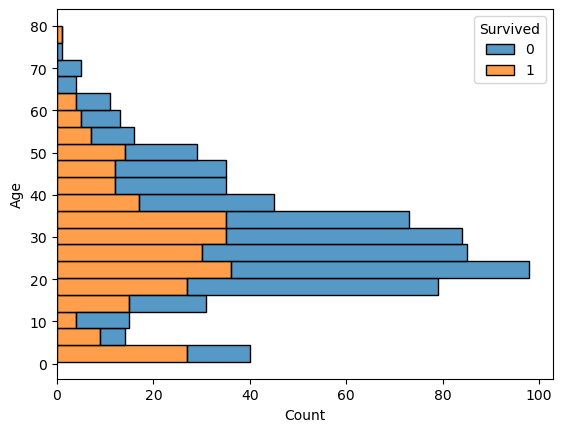

In [14]:
sns.histplot(y=train_data["Age"],hue=train_data["Survived"],multiple="stack");

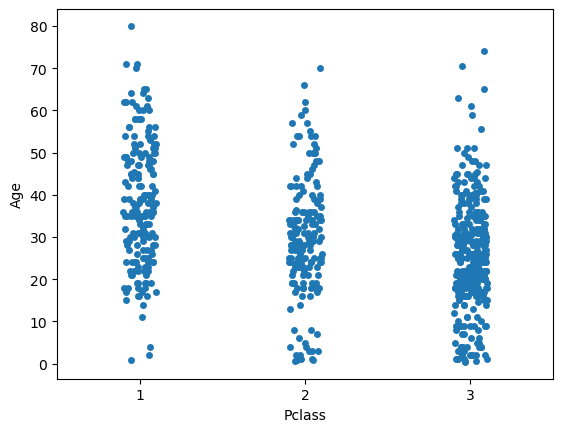

In [16]:
sns.stripplot(x='Pclass', y='Age', data=train_data);

## Preprocess the training data

In [18]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
train_data.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [21]:
train_data.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [23]:
train_data.drop(['PassengerId', 'Name', 'Ticket', 'Embarked'], axis=1, inplace=True)
train_data['Sex'] = LabelEncoder().fit_transform(train_data['Sex'])

In [24]:
test_data.drop(['PassengerId', 'Name', 'Ticket', 'Embarked'], axis=1, inplace=True)
test_data['Sex'] = LabelEncoder().fit_transform(test_data['Sex'])

In [25]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,1,22.0,1,0,7.2500,NaN
1,1,1,0,38.0,1,0,71.2833,C85
2,1,3,0,26.0,0,0,7.9250,NaN
3,1,1,0,35.0,1,0,53.1000,C123
4,0,3,1,35.0,0,0,8.0500,NaN
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,NaN
887,1,1,0,19.0,0,0,30.0000,B42
888,0,3,0,NaN,1,2,23.4500,NaN
889,1,1,1,26.0,0,0,30.0000,C148


In [28]:
train_data['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [29]:
train_data['Cabin'].str[0]

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

In [30]:
train_data['Cabin'] = train_data['Cabin'].str[0]
train_data = pd.get_dummies(train_data, columns=['Cabin'], dtype='int')

In [31]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,0,3,1,22.0,1,0,7.2500,0,0,0,0,0,0,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,1,0,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,0,0,0,0,0,0
3,1,1,0,35.0,1,0,53.1000,0,0,1,0,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,0,0,0,0,0,0,0
887,1,1,0,19.0,0,0,30.0000,0,1,0,0,0,0,0,0
888,0,3,0,NaN,1,2,23.4500,0,0,0,0,0,0,0,0
889,1,1,1,26.0,0,0,30.0000,0,0,1,0,0,0,0,0


In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin_A   891 non-null    int32  
 8   Cabin_B   891 non-null    int32  
 9   Cabin_C   891 non-null    int32  
 10  Cabin_D   891 non-null    int32  
 11  Cabin_E   891 non-null    int32  
 12  Cabin_F   891 non-null    int32  
 13  Cabin_G   891 non-null    int32  
 14  Cabin_T   891 non-null    int32  
dtypes: float64(2), int32(9), int64(4)
memory usage: 73.2 KB


In [36]:
train_data[train_data.Age.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
5,0,3,1,NaN,0,0,8.4583,0,0,0,0,0,0,0,0
17,1,2,1,NaN,0,0,13.0000,0,0,0,0,0,0,0,0
19,1,3,0,NaN,0,0,7.2250,0,0,0,0,0,0,0,0
26,0,3,1,NaN,0,0,7.2250,0,0,0,0,0,0,0,0
28,1,3,0,NaN,0,0,7.8792,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,1,NaN,0,0,7.2292,0,0,0,0,0,0,0,0
863,0,3,0,NaN,8,2,69.5500,0,0,0,0,0,0,0,0
868,0,3,1,NaN,0,0,9.5000,0,0,0,0,0,0,0,0
878,0,3,1,NaN,0,0,7.8958,0,0,0,0,0,0,0,0


## Handling Missing values of Training Dataset

In [37]:
imputer = KNNImputer(n_neighbors=5) # liczba sąsiadów najlepiej ja k jest niepatrzysta

In [38]:
train_data[['Age', 'Fare']] = imputer.fit_transform(train_data[['Age', 'Fare']])

In [41]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,0,3,1,22.0,1,0,7.2500,0,0,0,0,0,0,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,1,0,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,0,0,0,0,0,0
3,1,1,0,35.0,1,0,53.1000,0,0,1,0,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,0,0,0,0,0,0,0
887,1,1,0,19.0,0,0,30.0000,0,1,0,0,0,0,0,0
888,0,3,0,28.0,1,2,23.4500,0,0,0,0,0,0,0,0
889,1,1,1,26.0,0,0,30.0000,0,0,1,0,0,0,0,0


In [43]:
train_data[train_data.index == 5] 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
5,0,3,1,22.684,0,0,8.4583,0,0,0,0,0,0,0,0


In [46]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin_A   891 non-null    int32  
 8   Cabin_B   891 non-null    int32  
 9   Cabin_C   891 non-null    int32  
 10  Cabin_D   891 non-null    int32  
 11  Cabin_E   891 non-null    int32  
 12  Cabin_F   891 non-null    int32  
 13  Cabin_G   891 non-null    int32  
 14  Cabin_T   891 non-null    int32  
dtypes: float64(2), int32(9), int64(4)
memory usage: 73.2 KB


In [48]:
test_data['Cabin'] = test_data['Cabin'].str[0]
test_data = pd.get_dummies(test_data, columns=['Cabin'], dtype='int')

In [67]:
missing_columns = set(train_data.columns) - set(test_data.columns)
for column in missing_columns:
    test_data[column] = 0

In [68]:
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Survived
0,3,1,0.364165,0,0,-0.490783,0,0,0,0,0,0,0,0,0
1,3,0,1.300473,1,0,-0.507479,0,0,0,0,0,0,0,0,0
2,2,1,2.424042,0,0,-0.453367,0,0,0,0,0,0,0,0,0
3,3,1,-0.197619,0,0,-0.474005,0,0,0,0,0,0,0,0,0
4,3,0,-0.572142,1,1,-0.401017,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,-0.317467,0,0,-0.486337,0,0,0,0,0,0,0,0,0
414,1,0,0.701236,0,0,1.544246,0,0,1,0,0,0,0,0,0
415,3,1,0.663784,0,0,-0.502445,0,0,0,0,0,0,0,0,0
416,3,1,-0.317467,0,0,-0.486337,0,0,0,0,0,0,0,0,0


In [50]:
test_data[['Age', 'Fare']] = imputer.fit_transform(test_data[['Age', 'Fare']])

In [53]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Pclass   418 non-null    int64  
 1   Sex      418 non-null    int32  
 2   Age      418 non-null    float64
 3   SibSp    418 non-null    int64  
 4   Parch    418 non-null    int64  
 5   Fare     418 non-null    float64
 6   Cabin_A  418 non-null    int32  
 7   Cabin_B  418 non-null    int32  
 8   Cabin_C  418 non-null    int32  
 9   Cabin_D  418 non-null    int32  
 10  Cabin_E  418 non-null    int32  
 11  Cabin_F  418 non-null    int32  
 12  Cabin_G  418 non-null    int32  
dtypes: float64(2), int32(8), int64(3)
memory usage: 29.5 KB


In [54]:
X_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']

In [55]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,3,1,22.0,1,0,7.2500,0,0,0,0,0,0,0,0
1,1,0,38.0,1,0,71.2833,0,0,1,0,0,0,0,0
2,3,0,26.0,0,0,7.9250,0,0,0,0,0,0,0,0
3,1,0,35.0,1,0,53.1000,0,0,1,0,0,0,0,0
4,3,1,35.0,0,0,8.0500,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0,0,0,0,0,0,0,0
887,1,0,19.0,0,0,30.0000,0,1,0,0,0,0,0,0
888,3,0,28.0,1,2,23.4500,0,0,0,0,0,0,0,0
889,1,1,26.0,0,0,30.0000,0,0,1,0,0,0,0,0


In [56]:
scaler = StandardScaler()
train_data[['Age', 'Fare']] = scaler.fit_transform(train_data[['Age', 'Fare']])
test_data[['Age', 'Fare']] = scaler.transform(test_data[['Age', 'Fare']])

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
model = LogisticRegression(max_iter=1000)

In [59]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [60]:
y_train_pred = model.predict(X_train)

In [61]:
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", train_accuracy)

Accuracy: 0.8114478114478114


In [69]:
test_data.drop('Survived', axis=1, inplace=True)

In [70]:
predictions = model.predict(test_data)

In [71]:
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [72]:
passenger_ids = pd.read_csv('test.csv')['PassengerId']
output = pd.DataFrame({'PassengerId': passenger_ids, 'Survived Pred': predictions})

In [73]:
output

,PassengerId,Survived Pred
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
